In [1]:
from requests import get
from configparser import ConfigParser
from DotaApiWrapper import DotaAPIWrapper
from shutil import copyfileobj
import multiprocessing as mp
from pathlib import Path
from itertools import repeat
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL

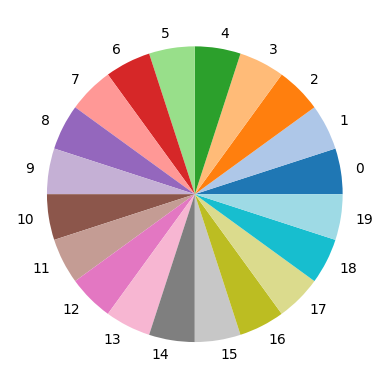

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20
plt.pie(np.ones(len(tableau20)),colors=tableau20,labels=[*range(len(tableau20))]);

In [3]:
home = Path(os.getcwd()).resolve()
config = ConfigParser()
config.read(Path(home.parent.resolve(), "Web.config"))
config["SECRETS"]["api_key"]
api = DotaAPIWrapper(config["SECRETS"]["api_key"])

In [68]:
def plot_matchups(hero_id: int, api: DotaAPIWrapper, window: int=5):
    heroes = api.heroes
    results = api.get_hero_matchups(hero_id=hero_id).json()
    lim = window+1
    xlim_games = max([res["games_played"] for res in results[:lim-1]])
    xlim_win_perc = max([res["wins"]/res["games_played"] for res in results[:lim-1]])
    fig = plt.figure(figsize=(5, 100*(lim/len(heroes))))
    s = "  Hero      Win Percentage          Matches       "
    title = plt.subplot2grid((lim,5), (0,0), colspan=5, fig=fig)
    title.text(0,0,s, fontsize=13)
    title.set_axis_off()
    for idx,res in enumerate(results[:lim-1]):
        file = Path(home,"assetts","images",f"{heroes[res['hero_id']]['localized_name']}.png")
        plot_img = plt.subplot2grid((lim,5), (idx+1,0), colspan=1, fig=fig)
        plot_img.imshow(np.asarray(PIL.Image.open(file)))
        plot_img.set_title(heroes[res['hero_id']]['localized_name'])
        plot_img.set_axis_off()
        matches_bar = plt.subplot2grid((lim,5), (idx+1,3), colspan=2, fig=fig)
        matches_bar.barh(0, res["games_played"], color=tableau20[6])
        matches_bar.barh(0, res["wins"], color=tableau20[7])
        matches_bar.set_xlim(xmax=xlim_games)
        matches_bar.set_title(f'{res["wins"]}/{res["games_played"]}')
        matches_bar.set_axis_off()
        win_perc_bar = plt.subplot2grid((lim,5), (idx+1,1), colspan=2, fig=fig)
        win_perc_bar.barh(0, res["wins"]/res["games_played"], color=tableau20[4])
        win_perc_bar.set_xlim(xmax=xlim_win_perc)
        win_perc_bar.set_title(f'{1/res["games_played"]*res["wins"]:.2%}')
        win_perc_bar.set_axis_off()
    plt.tight_layout()

In [72]:
plt.ioff()
plot_matchups(1, api, len(api.heroes))
plt.savefig(Path(home,"assetts","graphs","AbaddonMatchups.png"))

In [24]:
request = get("https://api.opendota.com/api/schema").json()

In [29]:
set(r["table_name"] for r in request)

{'api_key_usage',
 'api_keys',
 'competitive_rank',
 'cosmetics',
 'hero_ranking',
 'hero_search',
 'heroes',
 'items',
 'leaderboard_rank',
 'leagues',
 'match_gcdata',
 'match_logs',
 'match_patch',
 'matches',
 'mmr_estimates',
 'notable_players',
 'parsed_matches',
 'picks_bans',
 'player_matches',
 'player_ratings',
 'players',
 'public_matches',
 'public_player_matches',
 'queue',
 'rank_tier',
 'rank_tier_2019_1',
 'scenarios',
 'solo_competitive_rank',
 'subscriber',
 'subscriptions',
 'team_match',
 'team_rating',
 'team_scenarios',
 'teams',
 'user_usage',
 'webhooks'}